In [13]:
! pip install segmentation_models

   ---------------------------------------- 0.0/50.7 kB ? eta -:--:--
   ---------------------------------------- 50.7/50.7 kB ? eta 0:00:00


In [9]:
! pip install albumentations

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     -------------------------------------- 125.2/125.2 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/178.0 kB ? eta -:--:--
   --------------------------------------  174.1/178.0 kB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 178.0/178.0 kB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 5.9 MB/s eta 0:00:07
    --------------------------------------- 0.6/38.8 MB 5.8 MB/s eta 0:00:07
    --------------------------------------- 0.8/38.8 MB 6.3 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.8 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.7/38.8 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.8 MB 5.8 MB/s eta 0:00:07
   -- -

In [3]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 3.2 MB/s eta 0:02:01
   ---------------------------------------- 0.1/385.2 MB 1.8 MB/s eta 0:03:36
   ---------------------------------------- 0.2/385.2 MB 1.9 MB/s eta 0:03:25
   ---------------------------------------- 0.3/385.2 MB 1.9 MB/s eta 0:03:22
   ---------------------------------------- 0.4/385.2 MB 1.8 MB/s eta 0:03:37
   ---------------------------------------- 0.5/385.2 MB 1.8 MB/s eta 0:03:33
   ---------------------------------------- 0.6/385.2 MB 1.9 MB/s eta 0:03:23
   ---------------------------------------- 0.7/385.2 MB 1.8 MB/s eta 0:03:35
   ---------------------------------------- 0.7/385.2 MB 1.8 MB/s eta 0:0

In [1]:
import os
import sys
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Model stuff
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd


# in differnt folder
sys.path.append('../src/')
import model_utility
import preprocess_filter as pf   # YK edit
from preprocess_filter import apply_filters  # Ensure this is uncommented


Segmentation Models: using `tf.keras` framework.


C:\Users\yugad\anaconda3\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [7]:
import importlib as im

im.reload(model_utility)

<module 'model_utility' from 'C:\\Users\\yugad\\Spokes_ML\\model_utility.py'>

# What are we doing today?

model_path = "models/both_big_aug/"
type = "both_shift"
training_size = "1200"
epoch_num = "300"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

In [5]:
backbone = "resnet34"

epoch_num = "3"
model_path = "../models/trial_model3.keras"

# Create training data

In [11]:
from preprocess_filter import apply_filters  # Ensure this is uncommented

import os
import numpy as np
from PIL import Image
from preprocess_filter import apply_filters

# Define directory paths
directory = 'training_set_rpjbs'
savepath = 'training_set_thumbnails'

# Ensure the output directory exists
if not os.path.exists(savepath):
    os.makedirs(savepath)

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    if filename.endswith("rpjb"):
        processed_image = apply_filters(file_path)
        print("Processed image shape:", processed_image.shape)

        # Convert processed image to uint8 if it's in float format
        if processed_image.dtype != np.uint8:
            processed_image = (processed_image * 255).astype(np.uint8)  # Example conversion, adjust if needed

        # Convert the NumPy array to a PIL image
        img = Image.fromarray(processed_image)

        # Define the output filename (change extension to .png)
        output_filename = os.path.join(savepath, os.path.splitext(filename)[0] + '.png')

        # Save the image using PIL
        img.save(output_filename, format='PNG')

        # Verify saved image size using PIL
        with Image.open(output_filename) as img:
            print("Saved image size:", img.size)


In [9]:
X, Y = [], []

#X, Y = model_utility.data_gather_YK(X, Y, "training_set_thumbnails", "thumbnails", aug_flag = 1, aug_num = 5)

X, Y = model_utility.data_gather_YK(X, Y, "../comparing_ds_test/comparingDS_thumbnails", "../comparing_ds_test/LS_masks_OLD", aug_flag = 1, aug_num = 5)

#X, Y = model_utility.data_gather_YK(X, Y, "../jk_thumbnails", "../jk_masks", aug_flag = 1, aug_num = 5)

if X.shape != Y.shape:
    print("Error. Check shape")

498 498


In [11]:
print(X.shape)

print(Y.shape)

(498, 797, 2958)
(498, 797, 2958)


In [13]:
X = normalize(np.array(X), axis=1)
Y = (np.array(Y))/255.

# train/test split test_size = .15 for light, .25 for dark(no agu)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

SIZE_Y, SIZE_X = X.shape[1], X.shape[2]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

MemoryError: Unable to allocate 8.75 GiB for an array with shape (498, 797, 2958) and data type float64

In [ ]:
print(SIZE_Y)

print(SIZE_X)

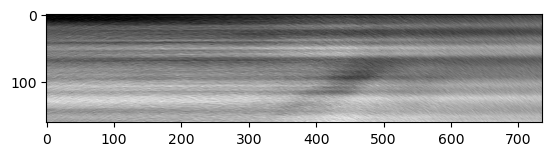

In [31]:
plt.imshow(x_train[18], cmap = 'gray')

In [33]:
model = sm.Unet(backbone_name="resnet34", encoder_weights = None, input_shape=(SIZE_Y,SIZE_X, 1))

#model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics=['accuracy'] )
#model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics=['BinaryIoU'] )

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ data (InputLayer)             │ (None, 160, 736, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_data (BatchNormalization)  │ (None, 160, 736, 1)       │               3 │ data[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 166, 742, 1)       │               0 │ bn_data[0][0]              │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv0 (Conv2D)                │ (None, 80, 368, 64)       │           3,136 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn0 (BatchNormalization)      │ (None, 80, 368, 64)       │             256 │ conv0[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ relu0 (Activation)            │ (None, 80, 368, 64)       │               0 │ bn0[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 82, 370, 64)       │               0 │ relu0[0][0]                │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooling0 (MaxPooling2D)       │ (None, 40, 184, 64)       │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stage1_unit1_bn1              │ (None, 40, 184, 64)       │             256 │ pooling0[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stage1_unit1_relu1            │ (None, 40, 184, 64)       │               0 │ stage1_unit1_bn1[0][0]     │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_2              │ (None, 42, 186, 64)       │               0 │ stage1_unit1_relu1[0][0]   │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stage1_unit1_conv1 (Conv2D)   │ (None, 40, 184, 64)       │          36,864 │ zero_padding2d_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stage1_unit1_bn2              │ (None, 40, 184, 64)       │             256 │ stage1_unit1_conv1[0][0]   │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stage1_unit1_relu2            │ (None, 40, 184, 64)       │               0 │ stage1_unit1_bn2[0][0]     │
│ (Activation)                  │                           │               

 Total params: 24,449,876 (93.27 MB)

 Trainable params: 24,432,530 (93.20 MB)

 Non-trainable params: 17,346 (67.76 KB)

None


In [35]:
print(x_train.shape)

print(y_train.shape)

print("Model output shape:", model.output_shape)


(51, 160, 736)
(51, 160, 736)
Model output shape: (None, 160, 736, 1)


In [37]:

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_path,
    monitor='BinaryIoU',
    mode='max',
    save_best_only=True, 
    verbose = True)


fit_model = model.fit(x_train, y_train, batch_size= 10, epochs = int(epoch_num) 
                      , verbose=1,  validation_split = .13 , callbacks = [model_checkpoint_callback])



Epoch 1/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - BinaryIoU: 0.2338 - loss: 0.8858
Epoch 1: BinaryIoU improved from -inf to 0.26066, saving model to ../models/trial_model2.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 117s 11s/step - BinaryIoU: 0.2383 - loss: 0.8749 - val_BinaryIoU: 0.4727 - val_loss: 0.8854
Epoch 2/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - BinaryIoU: 0.4532 - loss: 0.5992
Epoch 2: BinaryIoU improved from 0.26066 to 0.46263, saving model to ../models/trial_model2.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 8s/step - BinaryIoU: 0.4548 - loss: 0.5954 - val_BinaryIoU: 0.4730 - val_loss: 0.8701
Epoch 3/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - BinaryIoU: 0.4739 - loss: 0.4745
Epoch 3: BinaryIoU improved from 0.46263 to 0.47370, saving model to ../models/trial_model2.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 8s/step - BinaryIoU: 0.4739 - loss: 0.4723 - val_BinaryIoU: 0.4730 - val_loss: 0.8705
Epoch 4/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - BinaryIoU: 0.4698 - loss: 0.3980
Epoch 4: BinaryIoU did not improve fro


history = model_utility.fit_model_YK(x_train, y_train, model, model_path, batch_size = 10, epochs = int(epoch_num), validation_split = .13)

In [ ]:
dump_dict = history.history
dump_dict['eval_results'] = results

with open(f"{model_path_no_ext}.json", 'w') as f:
    json.dump(dump_dict, f)
f.close()

In [40]:
results = model.evaluate(x_test, y_test)

model_utility.save_model_history(model_path, model, fit_model, results)

#model.save('trial_model.keras')

#results

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - BinaryIoU: 0.4710 - loss: 0.9363
Which model is this:  


# Plots

In [44]:
results_path = "../models/trial_model2.json"

with open(results_path) as json_file:
        results = json.load(jsoan_file)

BinaryIoU = results['BinaryIoU']
val_BinaryIoU = results['val_BinaryIoU']
loss = results['loss']
val_loss = results['val_loss']

epochs = range(1, len(BinaryIoU) + 1)

FileNotFoundError: [Errno 2] No such file or directory: '../models/trial_model2.json'

NameError: name 'epochs' is not defined

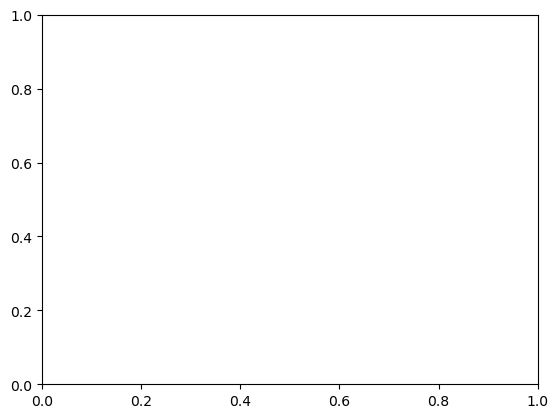

In [46]:
fig, ax = plt.subplots()

ax.plot(epochs, BinaryIoU, 'bo', label='Training acc')
ax.plot(epochs, val_BinaryIoU, 'b', label='Validation acc')
ax.legend()


Which model is this? - trial_model.json


KeyError: 'iou_score'

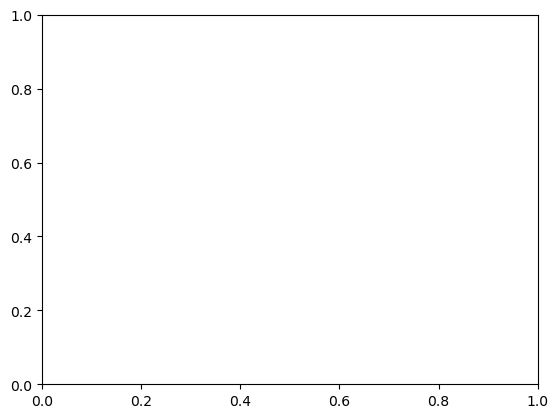

In [31]:
model_utility.display_results(model_path)
print(type)
print(training_size)
print(epoch_num)

In [3]:
model_path = "models/checkpoint/"
type = "darkGB_Callback_shuffled"
training_size = "360"
epoch_num = "300"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

In [13]:
from tensorflow import keras

model = keras.models.load_model(model_path, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

print(type)
print(training_size)
print(epoch_num)

both_shift
1200
300


# testing with images outside of train/test(light)

In [58]:
model_utility.model_testing(model, "training_set_thumbnails", 10)

The training_set_thumbnails/ training set is made of 0 images


AxisError: axis 1 is out of bounds for array of dimension 1